<a href="https://colab.research.google.com/github/SebastianGomezViggiano/Computer-Vision/blob/main/exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: IMAGE SEGMENTATION

Christian Mata, PhD

# Exercise 2

**Before starting:**

- Create a GitHub repository to upload the solution of this exercise.
- Share this GitHub link to your professor.

**Objectives**

Generate a single Python notebook implementing and answering the following questions:

🔹 **Task 1:** Load an image and apply a thresholding method. Analyze and discuss the segmentation results.

🔹 **Task 2:** Load an image and apply an unsupervised segmentation method (e.g., K-Means). Evaluate and comment on the outcome.

🔹 **Task 3:** Load an image and apply a supervised segmentation method (e.g., with annotated labels or using a classifier). Discuss the effectiveness and limitations.

🔹 **Task 4:** Explain the main differences between supervised and unsupervised segmentation approaches. Discuss their advantages and disadvantages, and illustrate your explanation with an example.


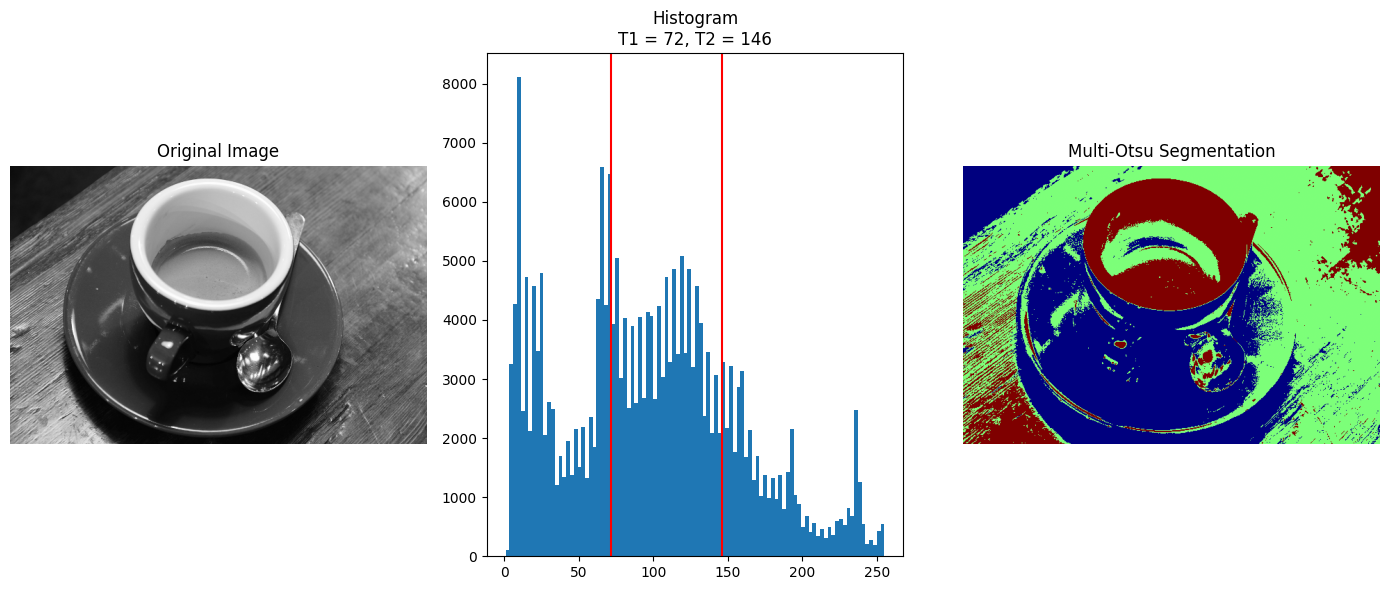

'\nhe Multi-Otsu method divides the grayscale image into three intensity-based regions using two thresholds. \nThese thresholds separate the background, mid-level details, and the brightest parts. \nThe histogram confirms that the chosen thresholds align well with major intensity peaks. \nIn the segmentation result, you can clearly identify different regions (e.g., background vs. objects) with distinct colors. \nThis method is efficient for simple image segmentation based on intensity.\n'

In [2]:
#Task 1: Load an image and apply a thresholding method. Analyze and discuss the segmentation results.

import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters
from skimage.filters import threshold_multiotsu
from skimage.color import rgb2gray

# --- Step 1: Load a grayscale image ---
# Example: Use the 'camera' image or change to another like 'coffee', converted to gray
image_rgb = data.coffee()  # change to any skimage image if needed
I = rgb2gray(image_rgb)    # convert to grayscale for thresholding

# Optional: Normalize to [0,255] for visualization purposes
I = (I * 255).astype(np.uint8)

# --- Step 2: Apply Multi-Otsu Thresholding ---
thresholds = threshold_multiotsu(I)

# --- Step 3: Segment the image using thresholds ---
regions = np.digitize(I, bins=thresholds)

# --- Step 4: Prepare the histogram data ---
flat_data = I.ravel()

# --- Step 5: Plot results ---
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))

# Original image
ax[0].imshow(I, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Histogram with thresholds
ax[1].hist(flat_data, bins=100, range=(1, 255))
ax[1].set_title(f'Histogram\nT1 = {thresholds[0]}, T2 = {thresholds[1]}')
for t in thresholds:
    ax[1].axvline(t, color='red')

# Segmentation result
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu Segmentation')
ax[2].axis('off')

plt.tight_layout()
plt.show()


"""
he Multi-Otsu method divides the grayscale image into three intensity-based regions using two thresholds.
These thresholds separate the background, mid-level details, and the brightest parts.
The histogram confirms that the chosen thresholds align well with major intensity peaks.
In the segmentation result, you can clearly identify different regions (e.g., background vs. objects) with distinct colors.
This method is efficient for simple image segmentation based on intensity.
"""

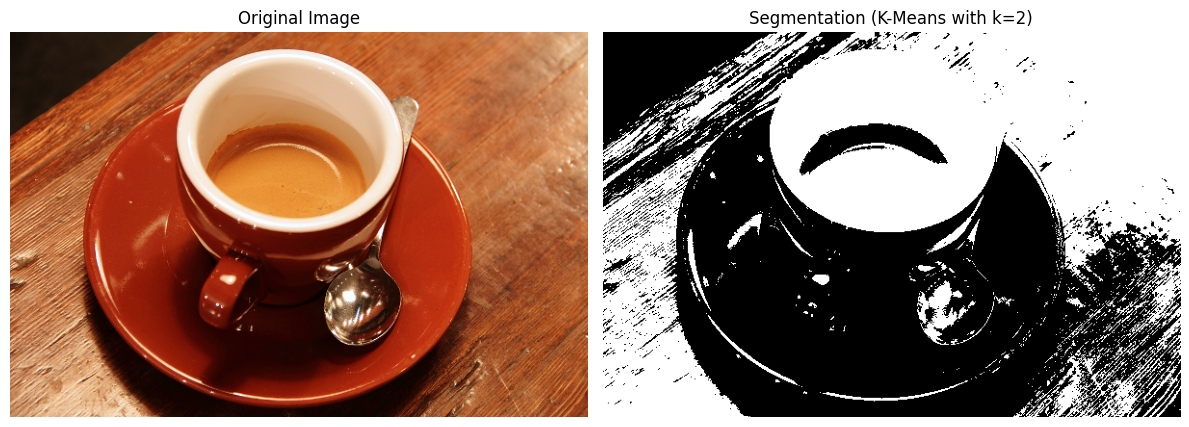

"\nEvaluation and Commentary:\nK-Means segmentation with \n𝑘\n=\n2\nk=2 partitions the image into two dominant clusters based on color similarity. \nIn the coffee image, the algorithm often separates the coffee cup (and possibly the background) based on color tones. \nThe result is binary-like, but the segmentation doesn't account for spatial continuity, which can lead to noisy borders or misclassified regions. \nIncreasing the number of clusters could better capture complex color distributions, but it might also reduce interpretability.\n"

In [3]:
#Task 2: Load an image and apply an unsupervised segmentation method (e.g., K-Means).
#Evaluate and comment on the outcome

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
import numpy as np
from skimage import data
from skimage.util import img_as_float

# --- Step 1: Load the image and normalize ---
I = data.coffee()                          # RGB image
I_float = img_as_float(I)                  # Convert to float for KMeans
w, h, d = I_float.shape
v_I = I_float.reshape((w * h, d))          # Reshape into (pixels, channels) for clustering

# --- Step 2: Apply K-Means ---
n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)
v_kmeans = kmeans.predict(v_I)

# --- Step 3: Reshape result back to image shape ---
I_kmeans = np.reshape(v_kmeans, (w, h))

# --- Step 4: Plotting ---
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(I)
ax1.set_title('Original Image')
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(I_kmeans, cmap='gray')
ax2.set_title(f'Segmentation (K-Means with k={n_clus})')
ax2.axis('off')

plt.tight_layout()
plt.show()


"""
Evaluation and Commentary:
K-Means segmentation with
𝑘
=
2
k=2 partitions the image into two dominant clusters based on color similarity.
In the coffee image, the algorithm often separates the coffee cup (and possibly the background) based on color tones.
The result is binary-like, but the segmentation doesn't account for spatial continuity, which can lead to noisy borders or misclassified regions.
Increasing the number of clusters could better capture complex color distributions, but it might also reduce interpretability.
"""

GNB Segmentation Metrics:
TPR = 0.969, FPR = 0.002, DSC = 0.984


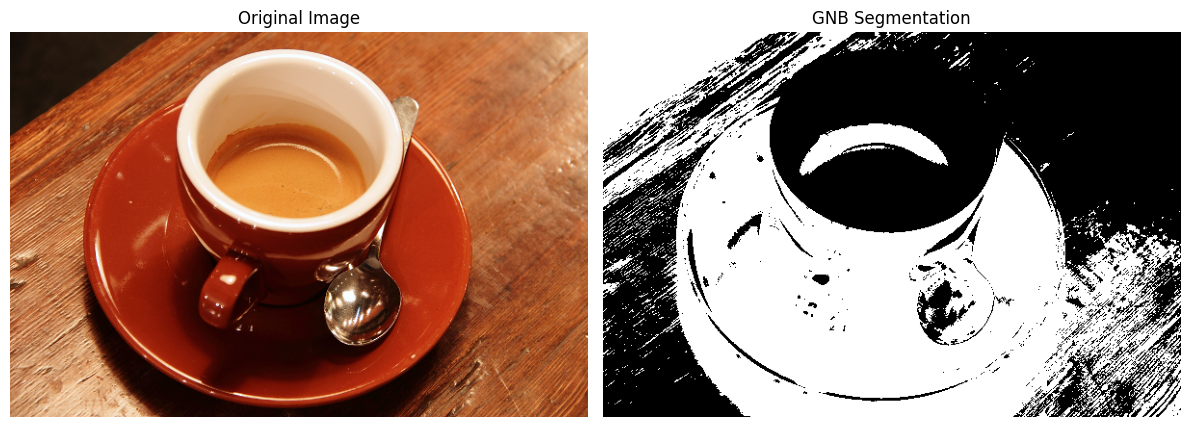

'\nEffectiveness:\nGaussian Naive Bayes segmentation is simple, fast, and effective when class distributions are close to Gaussian. It can separate regions well when the features (e.g., intensity or color) are discriminative between classes.\n\nLimitations:\n\nGNB assumes feature independence, which is not always true in image data.\n\nIt doesn’t exploit spatial context (each pixel is classified independently).\n\nSensitive to noise in the labels or overlapping class distributions.\n\nMetrics Interpretation:\n\nTPR reflects how many of the actual object pixels were correctly identified.\n\nFPR shows the rate of false alarms.\n\nDSC (Dice score) balances precision and recall — a good overall indicator of segmentation quality.\n'

In [6]:
#Task 3: Load an image and apply a supervised segmentation method (e.g., with annotated labels or using a classifier).
#Discuss the effectiveness and limitations.


import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# 1. Load image and prepare features
image = data.coffee()
h, w, c = image.shape
features = image.reshape((-1, 3))  # Use RGB as features

# 2. Simulate ground truth (unsupervised segmentation like KMeans to get pseudo-labels)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(features)
pseudo_labels = kmeans.labels_

# 3. Split into train/test
v_I_train, v_I_test, v_GT_train, v_GT_test = train_test_split(
    features, pseudo_labels, test_size=0.4, random_state=42, stratify=pseudo_labels
)

# 4. Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(v_I_train, v_GT_train)

# 5. Predict test
v_gnb = gnb.predict(v_I_test)

# 6. Predict entire image and reshape
full_pred = gnb.predict(features)
I_gnb = full_pred.reshape((h, w))

# 7. Evaluate on test
cm = confusion_matrix(v_GT_test, v_gnb)
tn, fp, fn, tp = cm.ravel()
TPR = tp / (tp + fn)
FPR = fp / (fp + tn)
DSC = 2 * tp / (2 * tp + fp + fn)

print("GNB Segmentation Metrics:")
print(f"TPR = {TPR:.3f}, FPR = {FPR:.3f}, DSC = {DSC:.3f}")

# 8. Visualize
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(I_gnb, cmap='gray')
ax[1].set_title("GNB Segmentation")
ax[1].axis('off')

plt.tight_layout()
plt.show()

"""
Effectiveness:
Gaussian Naive Bayes segmentation is simple, fast, and effective when class distributions are close to Gaussian. It can separate regions well when the features (e.g., intensity or color) are discriminative between classes.

Limitations:

GNB assumes feature independence, which is not always true in image data.

It doesn’t exploit spatial context (each pixel is classified independently).

Sensitive to noise in the labels or overlapping class distributions.

Metrics Interpretation:

TPR reflects how many of the actual object pixels were correctly identified.

FPR shows the rate of false alarms.

DSC (Dice score) balances precision and recall — a good overall indicator of segmentation quality.
"""


Task 4: Explain the main differences between supervised and unsupervised segmentation approaches. Discuss their advantages and disadvantages, and illustrate your explanation with an example.

| Aspect              | Supervised Segmentation                                                                        | Unsupervised Segmentation                                                                                                        |
| ------------------- | ---------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------- |
| **Definition**      | Relies on **labeled data** to train a classifier to recognize regions or objects in the image. | Does **not require labels**. Groups pixels based on similarity in color, intensity, or texture using clustering or thresholding. |
| **Input**           | Image + **ground truth labels** (e.g., masks, annotated pixels).                               | Only the **image** itself.                                                                                                       |
| **Output**          | Segmentation result based on learned patterns from the training data.                          | Segmentation result based on similarity/grouping in data.                                                                        |
| **Method examples** | SVM, Random Forest, Naive Bayes (e.g., GaussianNB).                                            | K-Means, Otsu Thresholding, Mean Shift, Watershed.                                                                               |
| **Training**        | Requires a **training phase** using known examples.                                            | No training phase required.                                                                                                      |
| **Generalization**  | Can generalize better to new data if trained well.                                             | Might not adapt well to new images with different patterns.                                                                      |



Advantages and Disadvantages


✅ Supervised
Advantages:

More accurate if enough labeled data is available.

Can learn complex patterns (e.g., textures, color + context).

Good performance in specific tasks (e.g., medical imaging).

Disadvantages:

Requires labeled data, which can be expensive and time-consuming.

Risk of overfitting if not enough data is available.



✅ Unsupervised
Advantages:

No need for annotated data.

Quick to apply and test on new images.

Good for exploratory analysis or unknown data.

Disadvantages:

Less accurate and less interpretable.

Sensitive to parameter choices (e.g., number of clusters).

May not align with human perception of objects.